In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
data = pd.read_excel('水资源2000_2019.xlsx',encoding='GBK')

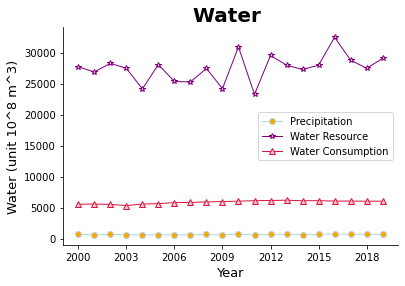

In [4]:
plt.plot(data['date'],data['precipitation(mm)'],label='Precipitation',linewidth=1,color='lightblue',marker='o',
markerfacecolor='orange',markersize=6)
plt.plot(data['date'],data['total_water_resource(10^8 m^3)'],label='Water Resource',linewidth=1,color='purple',marker='*',
markerfacecolor='pink',markersize=6)
plt.plot(data['date'],data['total_water_consumption'],label='Water Consumption',linewidth=1,color='#DC143C',marker='^',
markerfacecolor='pink',markersize=6)


my_x_ticks = np.arange(2000,2020,3)

plt.xlabel("Year",fontsize=13)
plt.ylabel("Water (unit 10^8 m^3)",fontsize=13)
plt.title('Water ', fontweight='bold',fontsize=20)
plt.xticks(my_x_ticks)
sns.despine()
plt.legend()
plt.show()

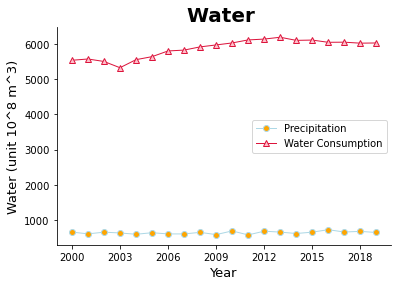

In [5]:
plt.plot(data['date'],data['precipitation(mm)'],label='Precipitation',linewidth=1,color='lightblue',marker='o',
markerfacecolor='orange',markersize=6)
plt.plot(data['date'],data['total_water_consumption'],label='Water Consumption',linewidth=1,color='#DC143C',marker='^',
markerfacecolor='pink',markersize=6)


my_x_ticks = np.arange(2000,2020,3)

plt.xlabel("Year",fontsize=13)
plt.ylabel("Water (unit 10^8 m^3)",fontsize=13)
plt.title('Water ', fontweight='bold',fontsize=20)
plt.xticks(my_x_ticks)
sns.despine()
plt.legend()
plt.show()

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [7]:
np.mean(data)

date                               2009.500
precipitation(mm)                   646.215
total_water_resource(10^8 m^3)    27463.830
total_water_consumption            5867.375
dtype: float64

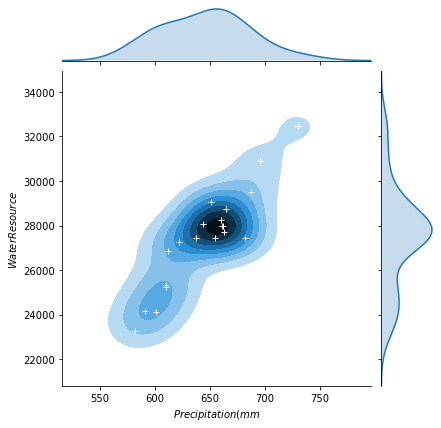

In [8]:
g = sns.jointplot(x="precipitation(mm)", y="total_water_resource(10^8 m^3)", data=data, kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Precipitation(mm$", "$Water Resource$");

In [9]:
data.head()

,region,date,precipitation(mm),total_water_resource(10^8 m^3),total_water_consumption
0,china,2000,663.0,27701.0,5531.0
1,china,2001,612.0,26868.0,5567.0
2,china,2002,660.0,28255.0,5497.0
3,china,2003,638.0,27460.0,5320.0
4,china,2004,601.0,24130.0,5548.0


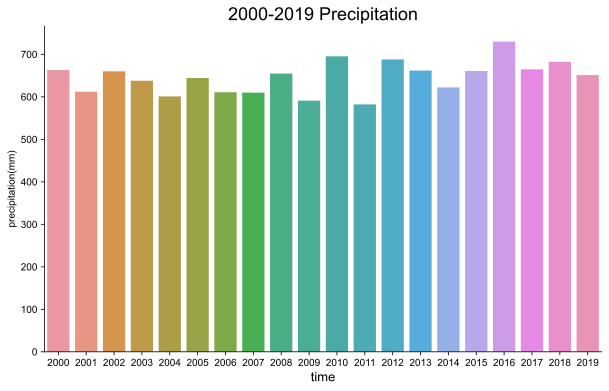

In [10]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
f, ax= plt.subplots(figsize = (10, 6))
sns.barplot(x=data['date'],y=data['precipitation(mm)'],ax=ax)
ax.set_title('2000-2019 Precipitation', fontsize=18)
plt.xlabel('time',fontsize=13)
sns.set_style("white") 
sns.despine()


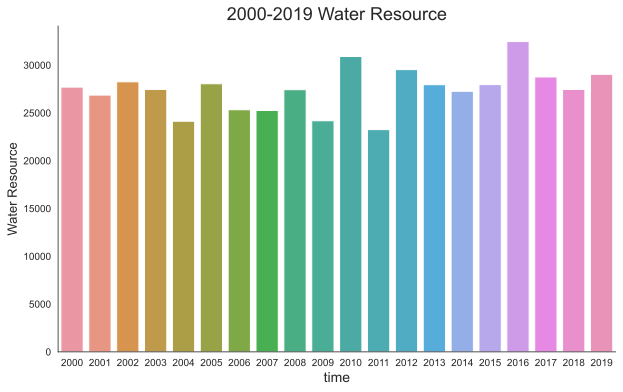

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f, ax= plt.subplots(figsize = (10, 6))
sns.barplot(x=data['date'],y=data['total_water_resource(10^8 m^3)'],ax=ax)
ax.set_title('2000-2019 Water Resource', fontsize=18)
plt.xlabel('time',fontsize=14)
plt.ylabel('Water Resource',fontsize=13)
sns.set_style("white") 
sns.despine()

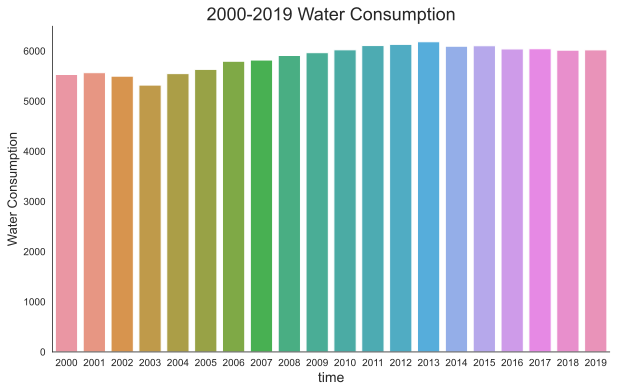

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
f, ax= plt.subplots(figsize = (10, 6))
sns.barplot(x=data['date'],y=data['total_water_consumption'],ax=ax)
ax.set_title('2000-2019 Water Consumption', fontsize=18)
plt.xlabel('time',fontsize=14)
plt.ylabel('Water Consumption',fontsize=13)
sns.set_style("white") 
sns.despine()


In [13]:
precipitation = np.array(data[['precipitation(mm)']])
precipitation.shape

(20, 1)

In [14]:
water_resource = np.array(data[['total_water_resource(10^8 m^3)']])
water_resource.shape

(20, 1)

In [15]:
total_water_consumption = np.array(data[['total_water_consumption']])
total_water_consumption.shape

(20, 1)

In [16]:
date = np.array(data[['date']])
date.shape

(20, 1)

<Figure size 288x288 with 0 Axes>

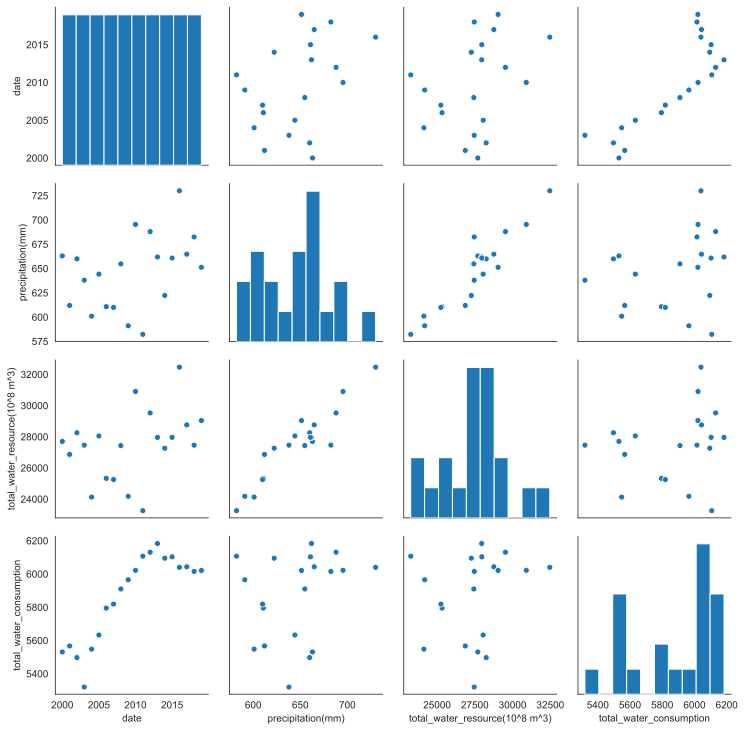

In [17]:
# Try to find the relationship between the four variables of time, precipitation, water resource and water consumption
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import rcParams

# figure size in inches
plt.figure(figsize=(4,4))
sns.pairplot(data)
plt.show()

In [18]:
#Correlation table between 4 variables
data[['date','precipitation(mm)','total_water_resource(10^8 m^3)','total_water_consumption']].corr()
# We find that there is a relation between precipitation and total water resource

,date,precipitation(mm),total_water_resource(10^8 m^3),total_water_consumption
date,1.000000,0.390883,0.350360,0.851298
precipitation(mm),0.390883,1.000000,0.933486,0.258048
total_water_resource(10^8 m^3),0.350360,0.933486,1.000000,0.207690
total_water_consumption,0.851298,0.258048,0.207690,1.000000


In [19]:
X = precipitation
Y = water_resource
X.shape,Y.shape

((20, 1), (20, 1))

In [20]:
lm=linear_model.LinearRegression()
model = lm.fit(X,Y)
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('The regression equation: y = {} + {} * x'.format(a, b))

The regression equation: y = -8274.813031679329 + 55.30457050931863 * x


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
X_train.shape,y_train.shape

((12, 1), (12, 1))

In [22]:
clf = linear_model.LinearRegression()
clf.fit (X_train,y_train)

LinearRegression()

In [23]:
# R square
lm.score(X_train,y_train)

0.9461814373640567

In [24]:
#将测试集的自变量代入到模型预测因变量
list(clf.predict(X_test))

[array([29573.54716525]),
 array([25426.16915683]),
 array([27738.11179131]),
 array([27944.00999031]),
 array([30332.42909871]),
 array([28532.29055888]),
 array([25355.5754886]),
 array([28361.689194])]

In [25]:
list(y_test)

[array([27462.5]),
 array([26868.]),
 array([29041.]),
 array([27434.]),
 array([30906.4]),
 array([28761.2]),
 array([25330.]),
 array([27957.9])]

In [26]:
# Regression line
a = float(clf.coef_ )
b = float(clf.intercept_)
print("y = " ,"%.2f" %a,"x +" , "%.2f" %b)

y =  58.83 x + -10576.60


In [27]:
((y_test - clf.predict(X_test)) **2).sum()

9038566.13535754

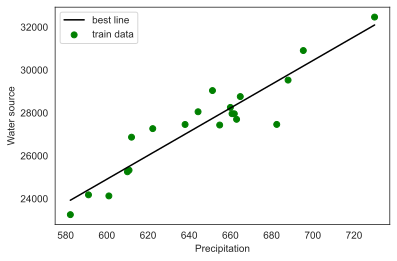

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#绘制散点图
plt.scatter(X, Y, color = 'green', label = 'train data')
#设定X,Y轴标签和title
plt.ylabel('Water source')
plt.xlabel('Precipitation')

#绘制最佳拟合曲线
Y_train_pred = model.predict(X_train)
plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#输出效果图
plt.legend(loc = 2)
plt.show()


((20, 1), (20, 1))

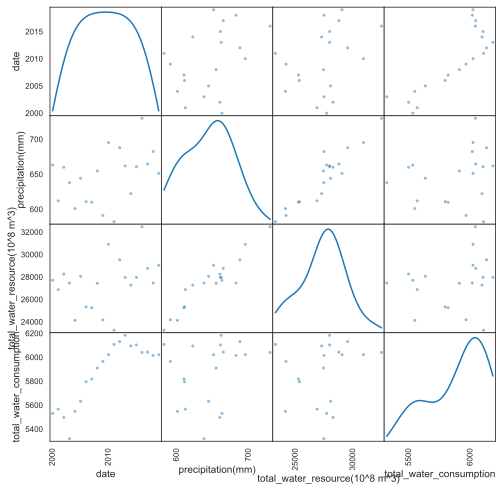

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['date','precipitation(mm)','total_water_resource(10^8 m^3)','total_water_consumption']], 
    figsize=(8, 8), diagonal='kde') 
X.shape,Y.shape

In [30]:
data[['date','precipitation(mm)','total_water_resource(10^8 m^3)','total_water_consumption']].corr()
# We find that there is a relation between precipitation and total water resource

,date,precipitation(mm),total_water_resource(10^8 m^3),total_water_consumption
date,1.000000,0.390883,0.350360,0.851298
precipitation(mm),0.390883,1.000000,0.933486,0.258048
total_water_resource(10^8 m^3),0.350360,0.933486,1.000000,0.207690
total_water_consumption,0.851298,0.258048,0.207690,1.000000


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8)

In [32]:
model = LinearRegression() # 构建线性模型
model.fit(X, Y)

LinearRegression()

In [33]:
predicts = model.predict(X)

In [34]:
R2 = model.score(X, Y) # 拟合程度 R2
print('R2 = %.3f' % R2)

R2 = 0.871


In [35]:
from sklearn.preprocessing import PolynomialFeatures
A = date
Z = total_water_consumption
poly_reg = PolynomialFeatures(degree=2) #degree=2表示二次多项式
A_poly = poly_reg.fit_transform(A) #构造datasets_X二次多项式特征X_poly
lin_reg_2 = linear_model.LinearRegression() #创建线性回归模型
lin_reg_2.fit(A_poly, Z)

LinearRegression()

In [36]:
A = date
Z = total_water_consumption
poly_reg_3 = PolynomialFeatures(degree=3)
A_poly_3 = poly_reg_3.fit_transform(A) #构造datasets_X三次多项式特征X_poly
lin_reg_3 = linear_model.LinearRegression() #创建线性回归模型
lin_reg_3.fit(A_poly_3, Z)

LinearRegression()

In [37]:
lin_reg_2.coef_, lin_reg_2.intercept_

(array([[ 0.00000000e+00,  1.19108323e+04, -2.95433470e+00]]),
 array([-11998981.7285523]))

In [38]:
lin_reg_3.coef_, lin_reg_3.intercept_

(array([[ 0.00000000e+00, -5.51576301e+06,  2.74782931e+03,
         -4.56296423e-01]]),
 array([3.69058564e+09]))

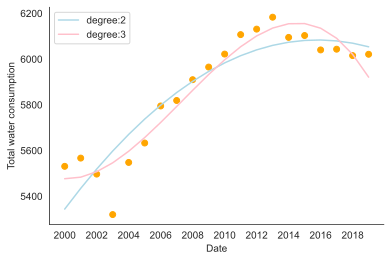

In [39]:
plt.scatter(A, Z, color='orange')   
plt.plot(A, lin_reg_2.predict(poly_reg.fit_transform(A)), color='lightblue', label = 'degree:2')     
plt.plot(A, lin_reg_3.predict(poly_reg_3.fit_transform(A)), color='pink', label = 'degree:3')  
plt.xlabel('Date')   
plt.ylabel('Total water consumption')  
my_x_ticks = np.arange(2000,2019,2)
plt.xticks(my_x_ticks)
plt.legend()
sns.despine()
plt.show()   

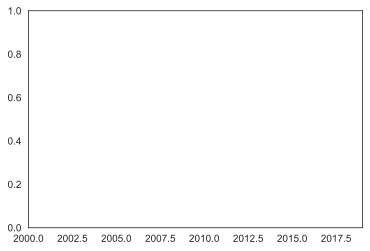

In [41]:
plt.xlim(2000,2019)
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

In [44]:
model = LinearRegression() # 构建线性模型
model.fit(X, Y) # 自变量在前，因变量在后
predicts = model.predict(X) # 预测值
R2 = model.score(X, Y) # 拟合程度 R2
print('R2 = %.3f' % R2) # 输出 R2
coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距
print(model.coef_, model.intercept_)

R2 = 0.871
[[55.30457051]] [-8274.81303168]


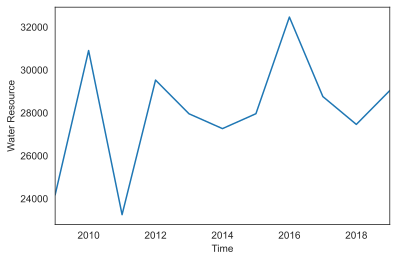

/Users/nina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


AIC: 212.3602


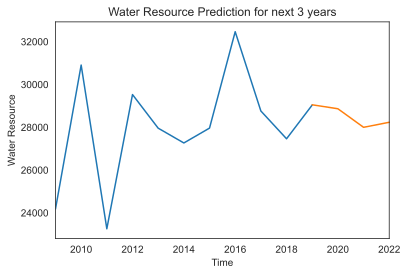

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot

data = [24180.2, 30906.4, 23256.7, 29528.8, 27957.9, 27266.9, 27962.6, 32466.2, 28760.9, 27462.8, 29041.0]
data = pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('2009','2019')
data.index = pd.Index(data_index)

data.plot(figsize=(6,4))
plt.xlabel('Time')   
plt.ylabel('Water Resource') 
plt.show()

arma = ARMA(data,(4,0)).fit()
print('AIC: %0.4lf' %arma.aic)

predict_y = arma.predict('2019','2022')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(6, 4))
ax = data.loc['2009':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.xlabel('Time')   
plt.ylabel('Water Resource')  
plt.title('Water Resource Prediction for next 3 years')


plt.show()

In [46]:
predict_y

2019-12-31    29050.640488
2020-12-31    28865.430785
2021-12-31    27998.645111
2022-12-31    28234.542406
Freq: A-DEC, dtype: float64

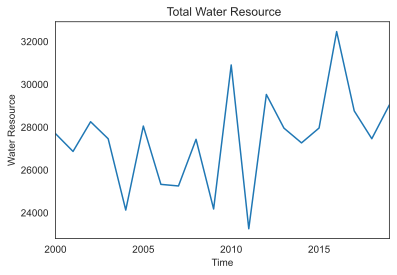

/Users/nina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


AIC: 369.5871


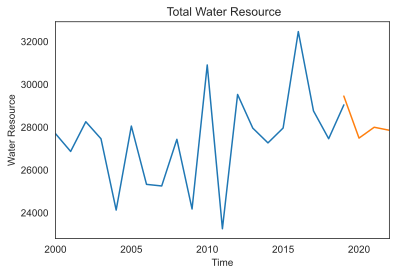

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
data = pd.read_excel('水资源2000_2019.xlsx',encoding='GBK')
data = data['total_water_resource(10^8 m^3)']
data = pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('2000','2019')
data.index = pd.Index(data_index)
data.plot(figsize=(6,4))
plt.title(" Total Water Resource")
plt.xlabel('Time')   
plt.ylabel('Water Resource')
plt.show()

arma = ARMA(data,(3,0)).fit()
print('AIC: %0.4lf' %arma.aic)

predict_y = arma.predict('2019','2022')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(6,4))
ax = data.loc['2000':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.title(" Total Water Resource")
plt.xlabel('Time')   
plt.ylabel('Water Resource')
plt.show()

In [48]:
predict_y

2019-12-31    29451.211420
2020-12-31    27491.553983
2021-12-31    27997.800612
2022-12-31    27856.916789
Freq: A-DEC, dtype: float64

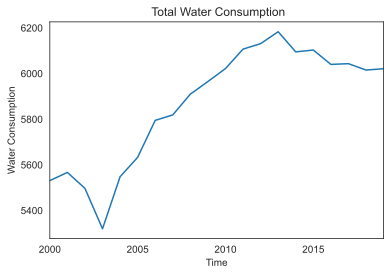

/Users/nina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


AIC: 246.9760


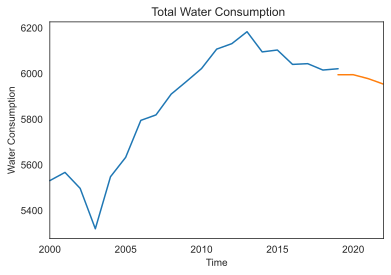

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
data = pd.read_excel('水资源2000_2019.xlsx',encoding='GBK')
water_c = data['total_water_consumption']
water_c = pd.Series(water_c)
data_index = sm.tsa.datetools.dates_from_range('2000','2019')
water_c.index = pd.Index(data_index)
water_c.plot(figsize=(6,4))
plt.xlabel('Time')   
plt.title(" Total Water Consumption")
plt.ylabel('Water Consumption')
plt.show()

arma = ARMA(water_c,(3,0)).fit()
print('AIC: %0.4lf' %arma.aic)

predict_y = arma.predict('2019','2022')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(6, 4))
ax = water_c.loc['2000':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.title(" Total Water Consumption")
plt.xlabel('Time')   
plt.ylabel('Water Consumption')
plt.show()

In [50]:
predict_y

2019-12-31    5994.934141
2020-12-31    5995.052946
2021-12-31    5977.507763
2022-12-31    5953.585793
Freq: A-DEC, dtype: float64